## Advanced ML Q-3

## Q- 3.
A company wants to predict the sales of its product based on the money spent
on different platforms for marketing. They want you to figure out how they can
spend money on marketing in the future in such a way that they can increase their
profit as much as possible built-in docker and use some library to display that in
frontend Dataset This is the Dataset You can use this dataset for this question. Note:
Use only Dask

In [2]:
!pip install dask[distributed] dask-ml dask[dataframe] scikit-learn matplotlib
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
df = dd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# checking for the null values
df.isnull().sum().compute() 

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# Split the data into features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\dell\anaconda3\lib\site-packages\dask_ml\model_selection\_split.py:462: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  warnings.warn(


In [7]:
# Convert Dask DataFrames to Dask arrays
X_train_array = X_train.to_dask_array(lengths=True)
y_train_array = y_train.to_dask_array(lengths=True)
X_test_array = X_test.to_dask_array(lengths=True)

In [8]:
from dask_ml.linear_model import LinearRegression
# Create the regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_array, y_train_array)


LinearRegression()

In [9]:
# Make predictions on the test data
y_pred_array = model.predict(X_test_array)
y_pred_array.compute()

array([15.31873078, 10.14519597, 13.03170119,  5.09315683, 14.9614054 ,
        9.80164337, 20.95170238, 23.61204422, 13.79222304, 10.30700575,
       20.62566909, 21.74250208, 20.50309568, 19.0095102 , 23.15360617,
       13.17661851,  9.14632439, 12.00087082, 20.61453565, 11.5137209 ,
       14.7689688 , 15.46995901, 16.22701825, 16.42927528,  9.30776498,
        5.13384777, 15.58401668, 13.70632586, 15.1660881 ,  8.73311076,
       18.6850426 ,  9.61515532, 17.62151987, 17.96850737, 14.18491149,
       17.25207556,  7.63834291,  5.75459829])

In [11]:
# Convert Dask arrays to NumPy arrays for plotting
y_test_np = y_test.compute().values
y_pred_np = y_pred_array.compute()

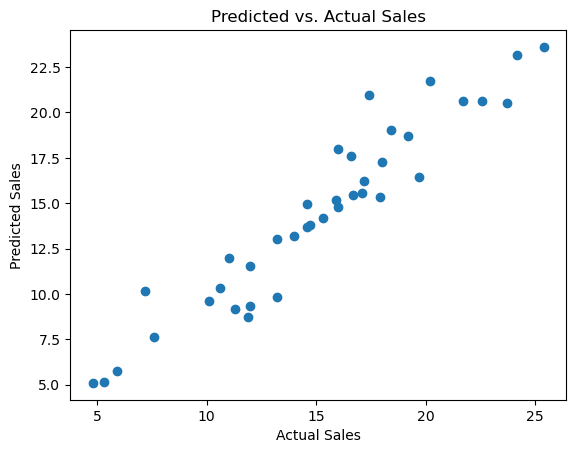

In [12]:
# Plot predicted sales vs. actual sales
plt.scatter(y_test_np, y_pred_np)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs. Actual Sales')
plt.show()

In [13]:
import pickle

# Save the model as a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
